In [1]:
%matplotlib notebook
from spatialmath import *
import numpy as np
import matplotlib.pyplot as plt


# Hacemos los imports correspondientes
# la libreria para trabajar con transformaciones en general
# y numpy, para trabajar a bajo nivel con los tensores

In [2]:
def modulo(vector, decimales = 3):
  """
  Funcion para calcular el modulo de un vector
  IN:  vector (dtype: numpy ndarray)
  OUT: modulo (dtype: numpy float64)

  Nota: tambien podría haber hecho
  np.sqrt(np.sum(np.power(vector,2)))
  (raiz de la suma de los cuadrados de los componentes)
  """
  return round(np.linalg.norm(vector),decimales)

In [25]:
def plotVectors(vectors, origin = np.array([0,0,0])):
    """
    Funcion para plotear vectores.
    Por defecto, todos los vectores tienen origen en [0,0,0]
    IN:
        param vectors: Lista de ndarray 1x3, conteniendo punto final del vector
        param origin: ndarray 1x3, conteniendo origen de vectores
    
    OUT:
        None
        
    TO-DO> Refactorizar para aceptar [origin,end]
    """
    
    # Creamos una figura
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Creamos una lista de colores y un iterador
    # El generador es para traer un color con next
    # y no usar un contador auxiliar (codigo mas limpio)
    colorList = ['r','g','b','y','c','m','k']
    colors = iter(colorList)
    
    #Ploteamos una terna de origen
    ax.quiver(*origin,1,0,0, color='r')
    ax.quiver(*origin,0,1,0, color='r')
    ax.quiver(*origin,0,0,1, color='r')
    
    # Seteamos limites de ejes
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])
    ax.set_zlim([-5,5])
    
    # Recorremos la lista de vectores
    for vector in vectors:
        print(vector)
        # Creamos un quiver para cada vector
        ax.quiver(*origin,vector[0,0], vector[0,1], vector[0,2], color = next(colors))
    plt.show() 



In [40]:
def miTransformacion(vector_puntos):
    """
    Funcion que aplica una transformacion dada, 
    pasado un vector de puntos (2D o 3D).
    IN:  vector (dtype: numpy ndarray)
    OUT: None
    """
    print("Vector original: {}".format(vector_puntos))
    print("Módulo vector original: {}".format(modulo(vector_puntos)))


    # Creo y aplico una R neutra (no hace nada)
    R1 = SO3()
    # Imprimo el tensor R1
    print("R1")
    print(R1.R)

    # aplico R1 sobre el vector dado.
    # nota: si hago vec*R1.R.T, no me da un resultado coherente
    # aplico matmul (puedo aplicar tambien dot o @)
    #print(vector_puntos.shape)
    #print(R1.R.shape)
    vec1 = np.matmul(vector_puntos,R1.R.T)
    print("R1 aplicada: {}".format(vec1))
    print("Módulo del resultado: {}".format(modulo(vec1)))

    # Probamos si los modulos son iguales
    assert(modulo(vector_puntos)==modulo(vec1))

    # Creo y aplico una R de rotacion en X de 90º
    R2 = SO3.Rx(90,'deg')
    print("R2")
    print(R2.R)
    print(vec1.shape)
    print(R2.R.shape)
    vec2 = np.matmul(vec1, R2.R.T)
    print("R2 aplicada: {}".format(vec2))
    print("Módulo del resultado: {}".format(modulo(vec2)))

    # Probamos si los modulos son iguales
    assert(modulo(vec1)==modulo(vec2))

    # Creo y aplico una R de rotacion en Z de -90º
    R3 = SO3.Rz(-90,'deg')
    print("R3")
    print(R3.R)
    vec3 = np.matmul(vec2, R3.R.T)
    print("R3 aplicada: {}".format(vec3))
    print("Módulo del resultado: {}".format(modulo(vec3)))

    # Probamos si los modulos son iguales
    assert(modulo(vec2)==modulo(vec3))

    # Aplicamos las transformaciones en una sola operacion
    vec4 = vector_puntos @ R1.R.T @ R2.R.T @ R3.R.T
    print("Todas las R aplicadas: {}".format(vec4))
    print("Modulo final: {}".format(modulo(vec4)))

    # Probamos si los modulos y los tensores son iguales
    #assert((vec3 == vec4).all())
    #assert(modulo(vector_puntos)==modulo(vec4))
    

    plotVectors([vec1, vec2, vec3])



Vector original: [[1 1 0]]
Módulo vector original: 1.414
R1
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
R1 aplicada: [[1. 1. 0.]]
Módulo del resultado: 1.414
R2
[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]
(1, 3)
(3, 3)
R2 aplicada: [[1.000000e+00 6.123234e-17 1.000000e+00]]
Módulo del resultado: 1.414
R3
[[ 6.123234e-17  1.000000e+00  0.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]
R3 aplicada: [[ 1.2246468e-16 -1.0000000e+00  1.0000000e+00]]
Módulo del resultado: 1.414
Todas las R aplicadas: [[ 1.2246468e-16 -1.0000000e+00  1.0000000e+00]]
Modulo final: 1.414


<IPython.core.display.Javascript object>


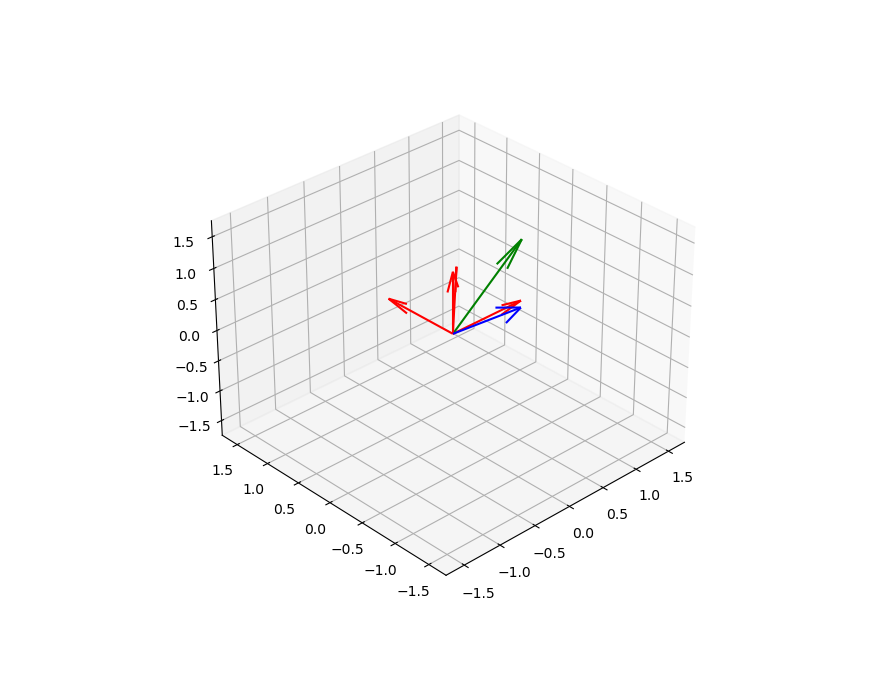

[[1. 1. 0.]]
[[1.000000e+00 6.123234e-17 1.000000e+00]]
[[ 1.2246468e-16 -1.0000000e+00  1.0000000e+00]]


In [41]:
# Creamos el vector a partir de una lista
# Nota: El vector de puntos debe 
p1 = np.array([1,1,0],ndmin=2)

miTransformacion(p1)